### The Sparks Foundation
### Task1 - Prediction using Supervised ML
### Pratyush Yadav

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
%matplotlib inline

In [2]:
student_data=pd.read_table('C:/Users/Pratyush Yadav/Desktop/COVID-19 Journal/student.txt',sep=',')

In [3]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


As can be seen, there are only 25 observations in the dataset given. In addition, it can be seen that on an average a student studies for 5.012 hours and the average scores obtained are 51.48. 
Average hours a student spends on studying from the sample is 5.012 hours. This is the sample mean, to draw inferences about the population mean, we construct a confidence interval.

In [4]:
upper = student_data['Hours'].mean() + 1.96*(student_data['Hours'].std()/math.sqrt(25))
lower = student_data['Hours'].mean() - 1.96*(student_data['Hours'].std()/math.sqrt(25))

In [5]:
confidence_interval = [lower, upper]
print('95% confidence interval for hours spent on studying:')
print(confidence_interval)

95% confidence interval for hours spent on studying:
[4.022163129399596, 6.001836870600403]


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

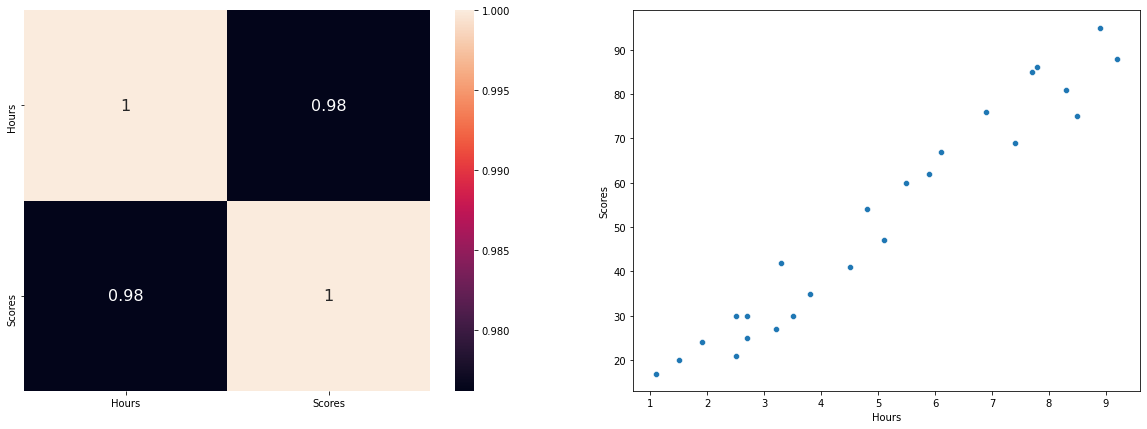

In [6]:
#Visualizing the relationship between hours spent and scores obtained

fig = plt.figure(figsize=(20,7))
fig.add_subplot(1,2,1)
sns.heatmap(student_data.corr(),annot=True, annot_kws={"fontsize":16})

fig.add_subplot(1,2,2)
sns.scatterplot(x=student_data['Hours'],y=student_data['Scores'])


The above graph and heatmap shows the correlation between the hours spent and the scores obtained. Unsurprisingly, the hours spent on studying is highly correlated with the scores obtained by a student. This correlation value is given by 0.98. We now proceed to create the regression model in order to predict the scores based on the hours studied.

In [7]:
# Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x= student_data['Hours'].values.reshape(-1,1)
y = student_data['Scores'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.25, random_state=150)

In [8]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [9]:
print('The Regression Equation is:\n Percentage Score = ' + str(lr_model.intercept_[0])+' + '+str(lr_model.coef_[0][0])+' x Hours')

The Regression Equation is:
 Percentage Score = 4.217973019249243 + 9.552748477087581 x Hours


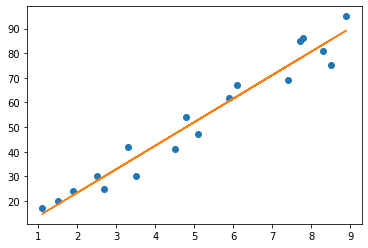

In [10]:
#Plotting the fitted line
predictions = lr_model.predict(x_train)
plt.plot(x_train,y_train,'o')
# change here
plt.plot(x_train, predictions, '-')
plt.show()

In [11]:
#Evaluating the Model
from sklearn import metrics

y_pred = lr_model.predict(x_test)
print('R2 value:',metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

R2 value: 0.951495493530316
Mean Absolute Error: 4.8040936216479935
Mean Squared Error: 29.039351057033635


In [12]:
#Predicting for given set of hours
hours = float(input('Enter the desired number of hours: '))
percentage_score = lr_model.predict([[hours]])
print('Predicted Percentage Score is', percentage_score.reshape(-1)[0])

Enter the desired number of hours: 9.25
Predicted Percentage Score is 92.58089643230937


### Testing the Assumptions of Regression
#### Residuals vs Fitted Values Plot

Text(0.5, 1.0, 'Residual Plot')

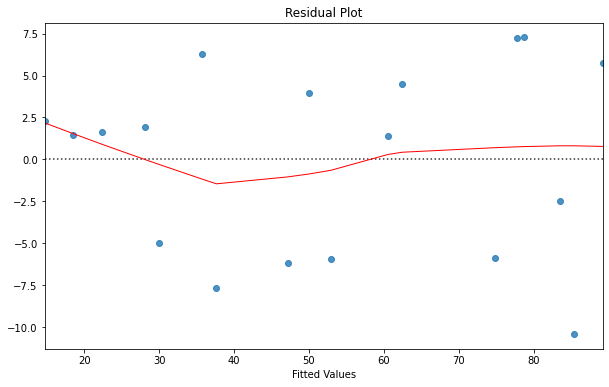

In [13]:
predictions = lr_model.predict(x_train)
residuals = y_train - predictions
plt.figure(figsize=(10,6))
sns.residplot(x=predictions, y=residuals,lowess=True,line_kws={'color':'red','lw':1,'alpha':1})
plt.xlabel('Fitted Values')
plt.title('Residual Plot')

The above plot shows a pattern which is a little concerning, as a result we go for testing the assumptions of regression

#### Linearity
The scatterplot plotted earlier shows that there is a linear relationship between the two variables, hence satisfying the linearity assumption of regression. This is also evident in the plot showing the regression line representing the relationship between the variables in question.

#### Autocorrelation of Error Terms

In [14]:
from statsmodels.stats.stattools import durbin_watson
import statsmodels.stats.api as sms
import scipy.stats as stats

# Durbin Watson Test
dw_test = durbin_watson(residuals)
print(dw_test[0])

1.5700673393766282


The value of Durbin Watson test should be between 1.5 and 2.5 ideally which indicates no auto-correlation between residuals in our case. We next test the assumption of heteroscedasticity which is also important. For this purpose we use the Breusch-pagan test.

#### Constant Variance of Error Terms

In [15]:
bp_test =sms.het_breuschpagan(residuals, x_train) 
print('p-value of f-test : '+str(bp_test[3]))

p-value of f-test : 2.0113390252027978e-05


The p-value is less than 0.05 which indicates that there is no heteroscedasticity in our dataset. Next important assumption is the normality assumption, for which we will take the help of visualization tools as well as parametric tests 

#### Normality of Residuals

ShapiroResult(statistic=0.9183567762374878, pvalue=0.12089289724826813)

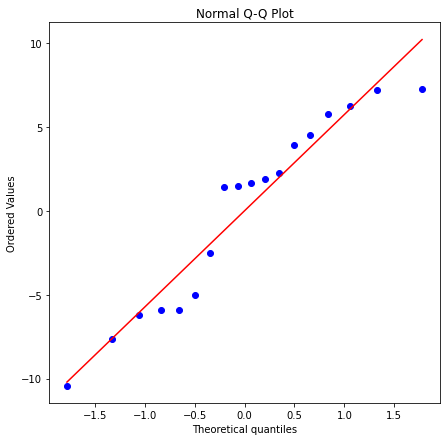

In [16]:
plt.figure(figsize=(7,7))
stats.probplot(residuals.reshape(-1), dist='norm',plot =plt)
plt.title('Normal Q-Q Plot')

stats.shapiro(residuals)

It seems the error terms more or less following the 45-degree line as seen from the Q-Q plot. Moreover, from the shapiro wilk test we see that the p-value is greater than 0.05. This means that we fail to reject the null hypothesis that the residuals follow a normal distribution. 

As a result, all the assumptions of linear regression have been checked and are satisfied, indicating that the analysis can be interpreted safely. 